In [ ]:
!pip install pymupdf  # For extracting text from PDF


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 35.6 MB/s eta 0:00:00


In [ ]:
import fitz  # PyMuPDF
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt


🔹 STEP 1: Upload and Read the PDF File

In [ ]:
from google.colab import files
uploaded = files.upload()  # Select the PDF file
#Upload in Google Colab:

Saving DG__ Quantitative Investment Strategies Daily Returns Gross (28022025).xlsx - Google Sheets.pdf to DG__ Quantitative Investment Strategies Daily Returns Gross (28022025).xlsx - Google Sheets.pdf


In [ ]:
file_path = list(uploaded.keys())[0]  # get uploaded file name
doc = fitz.open(file_path)

# Read all pages and join text
pdf_text = "\n".join([page.get_text() for page in doc])

#Load the PDF into Python using fitz


🔹 STEP 2: Extract the DG05 Strategy Table from the Text

In [ ]:
#Goal: Only extract Date and DG05 values
# Try to locate the start of the data table
match = re.search(r'Date\n.*', pdf_text, re.DOTALL)
data_text = match.group(0) if match else pdf_text

# Break it line by line
lines = data_text.strip().split('\n')


🔹 STEP 3: Parse the Data into a Table

In [ ]:
#Extract every Date + DG05 Return into a list
rows = []
for i in range(1, len(lines), 4):  # Data repeats every 4 lines
    try:
        date = lines[i - 1]  # Line before DG05 value
        dg05 = float(lines[i])
        rows.append([date, dg05])
    except:
        continue  # Skip any bad/malformed lines


🔹 STEP 4: Convert List to pandas DataFrame

In [ ]:
df_dg05 = pd.DataFrame(rows, columns=["Date", "DG05"])
print(df_dg05)


                 Date      DG05
0      0.006280484838  0.022928
1      0.001179698477 -0.007415
2     -0.007216363389 -0.016957
3      0.006680002957  0.014355
4      0.005546355597  0.003477
...               ...       ...
2146   0.008904424162  0.013885
2147   -0.00337959234  0.004907
2148        26/2/2025 -0.004314
2149  -0.003772264481 -0.000618
2150    0.00871984292  0.009971

[2151 rows x 2 columns]


 STEP 5: Convert Dates & Sort Chronologically

In [ ]:
df_dg05["Date"] = pd.to_datetime(df_dg05["Date"], errors='coerce')
df_dg05 = df_dg05.dropna().sort_values("Date").reset_index(drop=True)


<ipython-input-18-8d3fdad98776>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_dg05["Date"] = pd.to_datetime(df_dg05["Date"], errors='coerce')


🔹 STEP 6: Sanity Checks (Data Validation)

In [ ]:
print("Shape:", df_dg05.shape)
print("Any NaNs?", df_dg05.isnull().values.any())
print("Date Range:", df_dg05["Date"].min(), "→", df_dg05["Date"].max())
print("Return Range:", df_dg05["DG05"].min(), "→", df_dg05["DG05"].max())


Shape: (555, 2)
Any NaNs? False
Date Range: 2019-01-05 00:00:00 → 2025-11-02 00:00:00
Return Range: -0.2362186981 → 0.1461170379


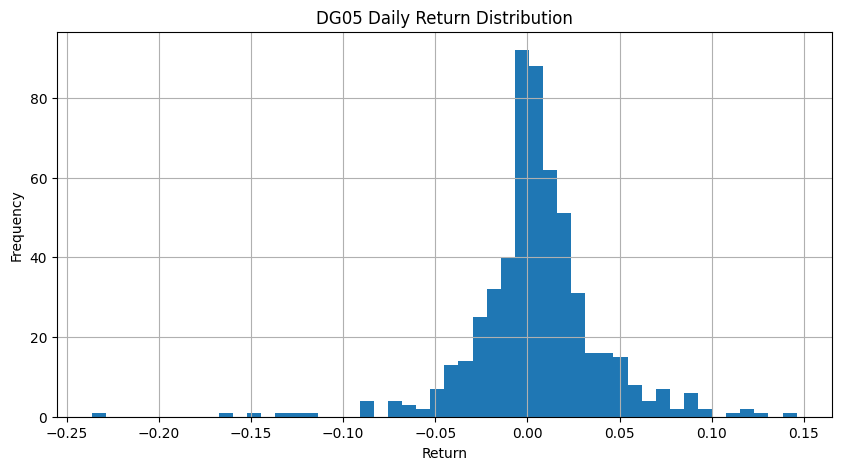

In [ ]:
#Plot Histogram of Returns
df_dg05["DG05"].hist(bins=50, figsize=(10, 5))
plt.title("DG05 Daily Return Distribution")
plt.xlabel("Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


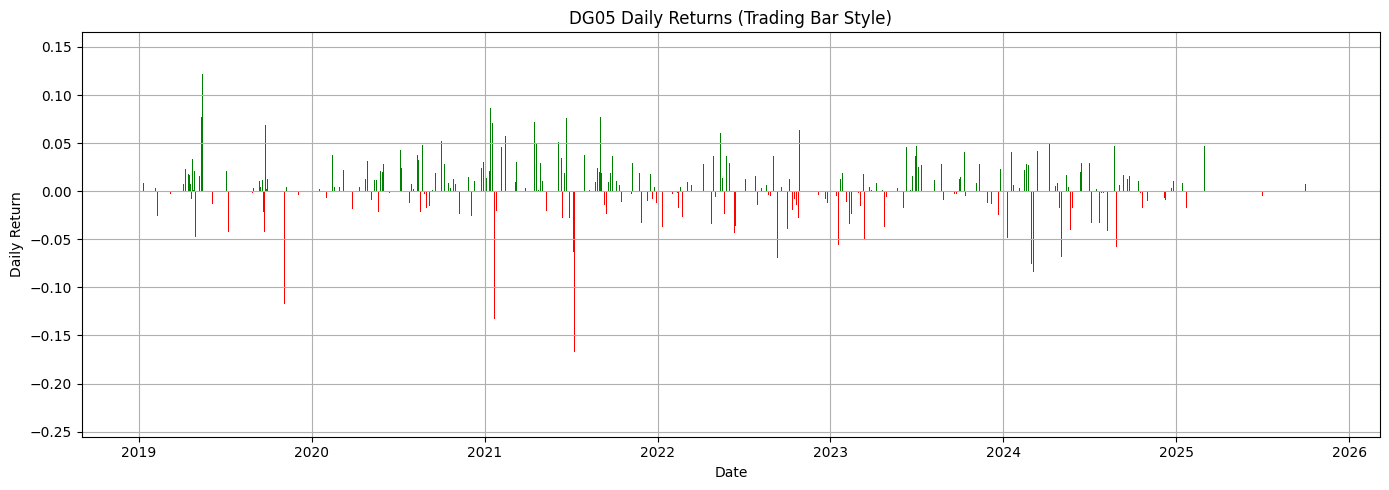

In [ ]:
# Trading-style bar graph of daily returns
plt.figure(figsize=(14, 5))
colors = ['green' if x >= 0 else 'red' for x in df_dg05["DG05"]]
plt.bar(df_dg05["Date"], df_dg05["DG05"], color=colors, width=1)
plt.title("DG05 Daily Returns (Trading Bar Style)")
plt.xlabel("Date")
plt.ylabel("Daily Return")
plt.grid(True)
plt.tight_layout()
plt.show()

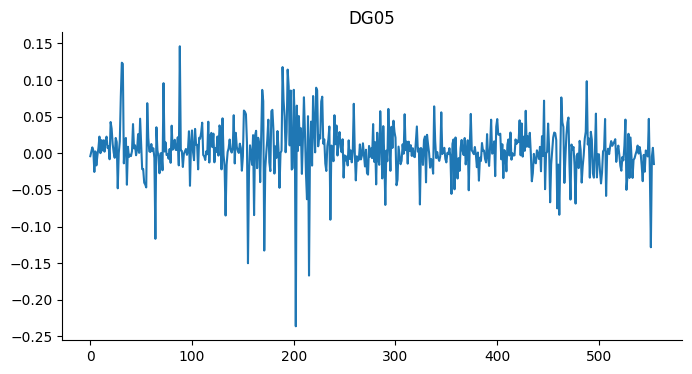

In [ ]:
# @title DG05

from matplotlib import pyplot as plt
df_dg05['DG05'].plot(kind='line', figsize=(8, 4), title='DG05')
plt.gca().spines[['top', 'right']].set_visible(False)

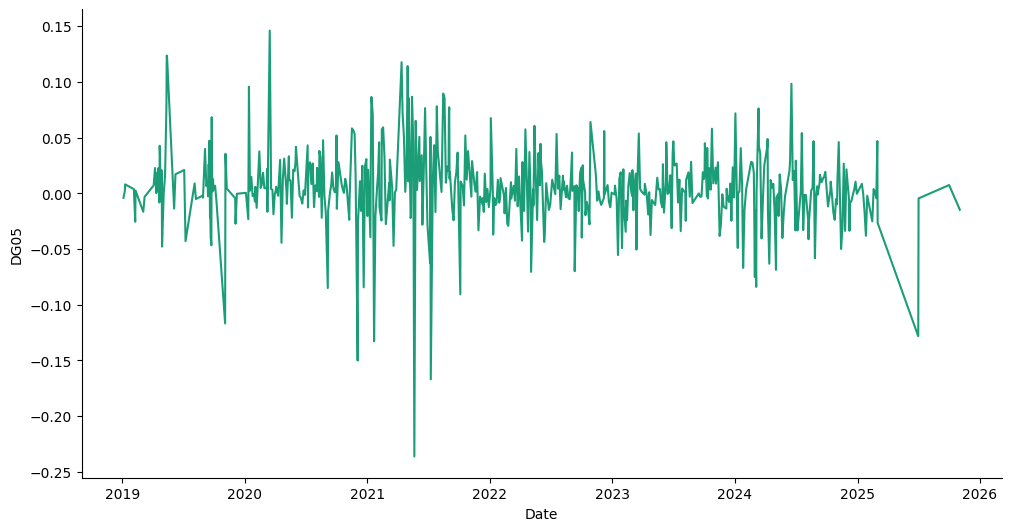

In [ ]:
# @title Date vs DG05

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['DG05']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df_dg05.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('DG05')

In [ ]:
#🔹 STEP 7: Save the Clean Dataset
df_dg05.to_csv("DG05_clean_returns.csv", index=False)
files.download("DG05_clean_returns.csv")  # Download to local


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#✅ Final Output:
df_dg05.head()


,Date,DG05
0,2019-01-05,-0.003993
1,2019-01-09,0.001986
2,2019-01-10,0.008069
3,2019-02-05,0.003804
4,2019-02-09,-0.025474


In [ ]:
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df_dg05)

https://docs.google.com/spreadsheets/d/1_OQhIQpNu2EPAOKvlkEZeRxIqsGaJWnYVkdGPG58ksA/edit#gid=0


📈 Phase 2: Core Quant Performance Analytics

In [ ]:
#Step 1: Load Cleaned Returns
#We load it into a pandas DataFrame:
df = pd.read_csv("DG05_clean_returns.csv")
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")


In [ ]:
#Step 2: Compute Cumulative Returns
#Cumulative return shows how your capital would grow over time.
df["Cumulative_Return"] = (1 + df["DG05"]).cumprod()
print(df)


          Date      DG05  Cumulative_Return
0   2019-01-05 -0.003993           0.996007
1   2019-01-09  0.001986           0.997984
2   2019-01-10  0.008069           1.006037
3   2019-02-05  0.003804           1.009864
4   2019-02-09 -0.025474           0.984139
..         ...       ...                ...
550 2025-03-02 -0.026531          11.350984
551 2025-07-01 -0.128287           9.894800
552 2025-07-02 -0.004534           9.849942
553 2025-10-01  0.007458           9.923403
554 2025-11-02 -0.014703           9.777498

[555 rows x 3 columns]


In [ ]:
#Step 3: Compute CAGR (Compound Annual Growth Rate)
#CAGR = "How much return would I have made each year, compounded?"
num_years = (df["Date"].iloc[-1] - df["Date"].iloc[0]).days / 365.25
cagr = (df["Cumulative_Return"].iloc[-1]) ** (1 / num_years) - 1
print(cagr)


0.3966207613634589


In [ ]:
#Step 4: Compute Volatility
#Volatility = risk or uncertainty. We annualize the standard deviation of daily returns:
volatility = df["DG05"].std() * np.sqrt(252)
print(volatility)

0.5553213348035705


In [ ]:
#Step 5: Compute Sharpe Ratio
#Sharpe = Return / Risk. Higher is better.
sharpe = df["DG05"].mean() / df["DG05"].std() * np.sqrt(252)
print(sharpe)

2.1505507000063986


In [ ]:
#Step 6: Compute Max Drawdown
#Drawdown = How much your capital fell from a peak. This is real pain for any investor.
running_max = df["Cumulative_Return"].cummax()
drawdown = df["Cumulative_Return"] / running_max - 1
max_drawdown = drawdown.min()
print(running_max)
print(drawdown)

0       0.996007
1       0.997984
2       1.006037
3       1.009864
4       1.009864
         ...    
550    14.565374
551    14.565374
552    14.565374
553    14.565374
554    14.565374
Name: Cumulative_Return, Length: 555, dtype: float64
0      0.000000
1      0.000000
2      0.000000
3      0.000000
4     -0.025474
         ...   
550   -0.220687
551   -0.320663
552   -0.323743
553   -0.318699
554   -0.328716
Name: Cumulative_Return, Length: 555, dtype: float64


In [ ]:
#Step 7: Calmar Ratio
#Calmar = CAGR / Max Drawdown
#it balances how much return you make per unit of worst-case risk.
calmar_ratio = cagr / abs(max_drawdown)
print(calmar_ratio)

1.2065747265502988


In [ ]:
#tep 8: Win Rate (How Often You Win)
win_rate = (df["DG05"] > 0).mean()
print(win_rate)

0.590990990990991


In [ ]:
#Step 9: Skewness & Kurtosis
#These describe the shape of your return distribution:
#Skew < 0 = more large losses
#Kurtosis > 3 = fatter tails (extreme outcomes)
skewness = df["DG05"].skew()
kurtosis = df["DG05"].kurt()
print(skewness, kurtosis)

-0.7463565194480473 7.19526932824445


Final Output:
{
  "Cumulative Return": "877.75%",
  "CAGR": "39.66%",
  "Volatility": "55.53%",
  "Sharpe": 2.15,
  "Max Drawdown": "-32.87%",
  "Calmar": 1.21,
  "Win Rate": "59.10%",
  "Skewness": -0.75,
  "Kurtosis": 7.20
}


📉 Phase 3: Strategy Visualizations — Explained Step-by-Step
🎯 Objective:
Visualize how the DG05 strategy performs over time, understand its risk behavior, and compare it to BTC as a benchmark — using well-established quant plotting techniques.



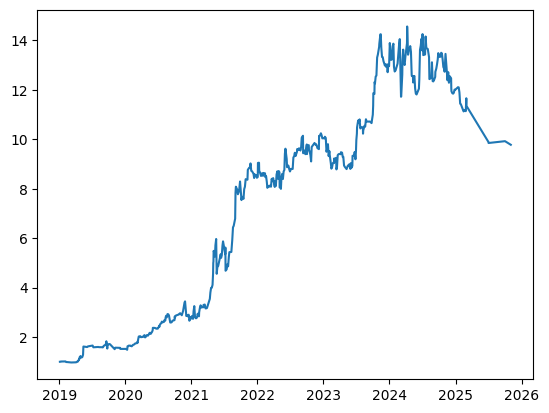

In [ ]:
#tep 1: Plot the Equity Curve
#📈 The Equity Curve shows how ₹1 invested in DG05 grows over time through compounding.
df["Cumulative_Return"] = (1 + df["DG05"]).cumprod()
plt.plot(df["Date"], df["Cumulative_Return"])


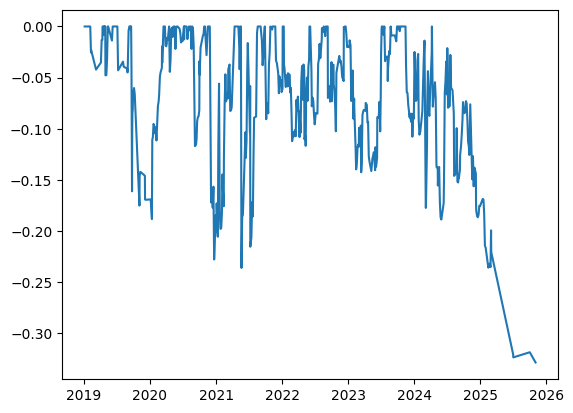

In [ ]:
#Step 2: Plot the Drawdown Curve
#🔻 Drawdown shows how far your strategy falls below its previous peak.
running_max = df["Cumulative_Return"].cummax()
drawdown = df["Cumulative_Return"] / running_max - 1
plt.plot(df["Date"], drawdown)


<BarContainer object of 555 artists>

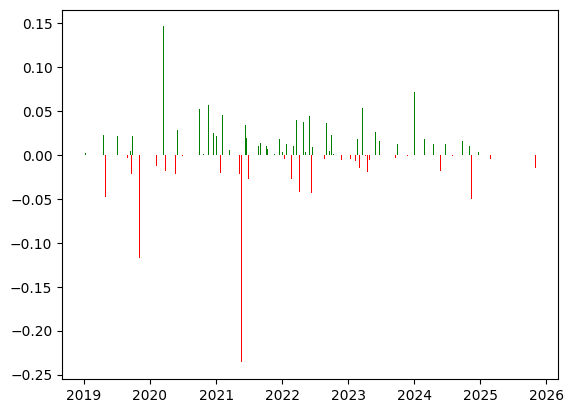

In [ ]:
#Step 3: Trading-Style Daily Return Bar Chart
#📊 Like a trading P&L blotter: green for gains, red for losses.
colors = ['green' if x >= 0 else 'red' for x in df["DG05"]]
plt.bar(df["Date"], df["DG05"], color=colors)


          Date      DG05  Cumulative_Return
0   2019-01-05 -0.003993           0.996007
1   2019-01-09  0.001986           0.997984
2   2019-01-10  0.008069           1.006037
3   2019-02-05  0.003804           1.009864
4   2019-02-09 -0.025474           0.984139
..         ...       ...                ...
550 2025-03-02 -0.026531          11.350984
551 2025-07-01 -0.128287           9.894800
552 2025-07-02 -0.004534           9.849942
553 2025-10-01  0.007458           9.923403
554 2025-11-02 -0.014703           9.777498

[555 rows x 3 columns]


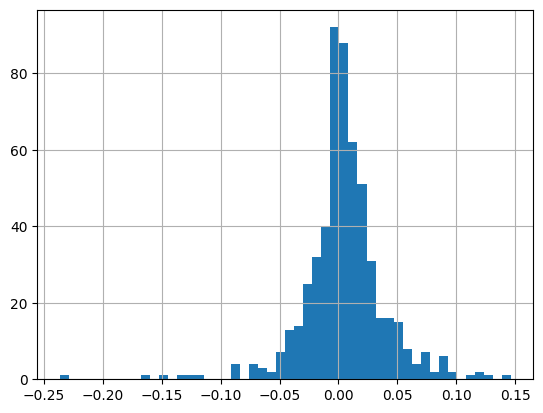

In [ ]:
#Step 4: Return Distribution Histogram (NEW)
#📈 This shows how often a certain return size occurs.
df["DG05"].hist(bins=50)
print(df)

#Normal distribution = bell-shaped
#Skewed = lopsided
#Fat tails = high kurtosis

<Axes: xlabel='Month', ylabel='Year'>

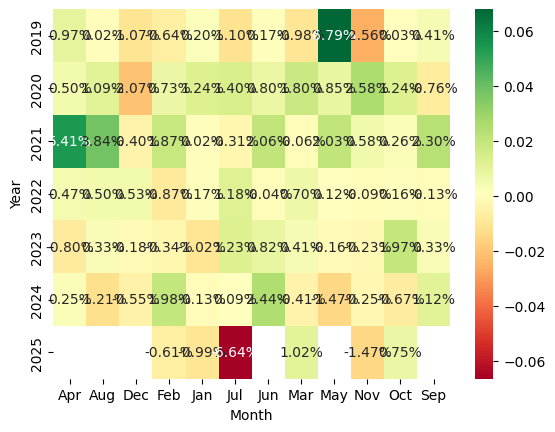

In [ ]:
#Step 5: Monthly Return Heatmap (NEW)
#📅 Helps identify seasonal behavior by month × year.
# Convert to % return, group by year-month
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.strftime("%b")
pivot = df.pivot_table(values="DG05", index="Year", columns="Month")
sns.heatmap(pivot, annot=True, fmt=".2%", cmap="RdYlGn")


Text(0.5, 1.0, '90-Day Rolling Sharpe Ratio')

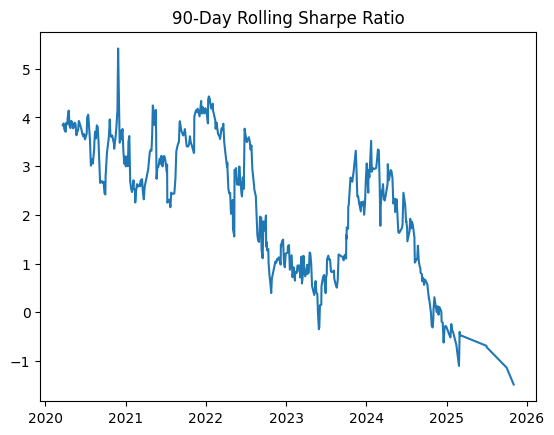

In [ ]:
#1. Rolling Sharpe Ratio Plot
#Tracks stability of risk-adjusted returns over time.

window = 90  # 90-day rolling
rolling_sharpe = df["DG05"].rolling(window).mean() / df["DG05"].rolling(window).std() * np.sqrt(252)

plt.plot(df["Date"], rolling_sharpe)
plt.title("90-Day Rolling Sharpe Ratio")




In [ ]:
#Rolling Volatility Plot
#Tracks risk bursts or calm zones in the strategy.

rolling_vol = df["DG05"].rolling(90).std() * np.sqrt(252)
print(rolling_vol)


0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
550    0.476266
551    0.503167
552    0.503185
553    0.485979
554    0.480530
Name: DG05, Length: 555, dtype: float64


Text(0, 0.5, 'Current Day Return')

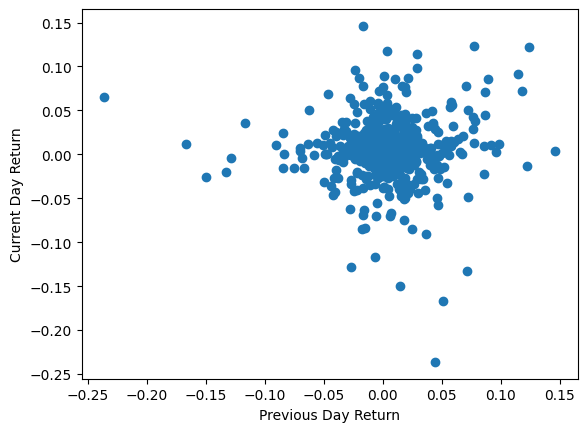

In [ ]:
plt.scatter(df["DG05"].shift(1), df["DG05"])
plt.xlabel("Previous Day Return")
plt.ylabel("Current Day Return")

# Lagged Return Scatterplot
#Visualizes return autocorrelation (lag-1 vs current return)
#✅ Can show structural alpha, reversion, or overreaction